# Projet Python
## Drug consumption dataset 
### Jack Heger, Jerme Henin, Francois-xavier Hérande

## I. DATA PRE-PROCESSING

The database comprises records for 1885 respondents, each with 12 attributes, including personality measurements (neuroticism, extraversion, openness to experience, agreeableness, conscientiousness), impulsivity, sensation seeking, education level, age, gender, residence country, and ethnicity. The respondents were surveyed about their use of 18 substances (legal, illegal, and a fictional drug called Semeron), indicating frequency of usage (never, over a decade ago, within the last decade, year, month, week, or day). The database encompasses 18 classification problems, each with seven classes denoting distinct levels of drug usage.

Mapping collumns with readable values if needed. We use a a csv file to store all these values to make the code easier to read.

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns 

csv_file = 'mapping_file.csv'

category_indices = {
    'Age': (1, 7),
    'Gender': (8, 10),
    'Education': (11, 20),
    'Country': (21, 28),
    'Ethnicity': (29, 36),
    'Nscore': (37, 86),
    'Escore': (87, 129),
    'Oscore': (130, 165),
    'Ascore': (166, 207),
    'Cscore': (208, 249),
    'Usage' : (250,258),
}

age_mapping = {}
gender_mapping = {}
education_mapping = {}
country_mapping = {}
ethnicity_mapping = {}
NSCORE_neo_mapping= {}
ESCORE_neo_mapping = {}
OSCORE_neo_mapping = {}
ASCORE_neo_mapping = {}
CSCORE_neo_mapping = {}
usage_mapping ={}



def fill_dict(d,l,s,e, make_int = False, is_drug = False) :
    for i in range(len(l[s:e])) :
        if is_drug : 
            d[str(l[s:e][i][0])] = int(l[s:e][i][1])
        elif not make_int :
            d[float(l[s:e][i][0])] = l[s:e][i][1]
        else :
            d[float(l[s:e][i][0])] = int(l[s:e][i][1])
        
        


# Open the CSV file in read mode
with open(csv_file, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    # Read the rows from the CSV file
    rows = list(reader)

    fill_dict(age_mapping, rows, *category_indices['Age'])
    fill_dict(gender_mapping, rows, *category_indices['Gender'])
    fill_dict(education_mapping, rows, *category_indices['Education'])
    fill_dict(country_mapping, rows, *category_indices['Country'])
    fill_dict(ethnicity_mapping, rows, *category_indices['Ethnicity'])
    fill_dict(NSCORE_neo_mapping, rows, *category_indices['Nscore'], make_int=True)
    fill_dict(ESCORE_neo_mapping, rows, *category_indices['Escore'], make_int=True)
    fill_dict(OSCORE_neo_mapping, rows, *category_indices['Oscore'], make_int=True)
    fill_dict(ASCORE_neo_mapping, rows, *category_indices['Ascore'], make_int=True)
    fill_dict(CSCORE_neo_mapping, rows, *category_indices['Cscore'], make_int=True)
    fill_dict(usage_mapping, rows, *category_indices['Usage'], is_drug=True)


columns_to_map = ["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke",
                  "Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth",
                  "Mushrooms","Nicotine","VSA"]




Take off filter warnings for better visualizations : 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In the database

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('drug_consumption.data', header=None, delimiter=',')

new_column_names= ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]
df.columns = new_column_names
dfgraph=df.copy()

We have noticed in the dataset information that "one fictitious drug (Semeron) which was introduced to identify over-claimers".<br></br> In our case we do not trust the people that state that they have used "Semeron", for that reason we delete all the "over-claimer" rows.
<br></br>As there are only 8 over-claimers, removing them will not lead to a substancial change in the distribution and characteristics of the data. In that case re-normalizing the remaining dataset after removing the over-claimers is not necessary

In [4]:
# get rid of all the over_claimers
df = df[df['Semer'] =='CL0']

# Drop the semer column 
df = df.drop("Semer", axis=1)

Map the drug columns with int values : 

In [5]:
for col in columns_to_map :
    df[col] = df[col].map(usage_mapping)

df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0


# II.DATA VISUALIZATION

###  a. visualisation for understanding the population

In [19]:
dfv=df.copy()

dfv["Age"] = dfv["Age"].map(age_mapping)
dfv["Gender"] = dfv["Gender"].map(gender_mapping)
dfv["Education"] = dfv["Education"].map(education_mapping)
dfv["Country"] = dfv["Country"].map(country_mapping)
dfv["Ethnicity"] = dfv["Ethnicity"].map(ethnicity_mapping)
# Pour l'instant on ne map pas les neo ffri scores pour utiliser correctement les modèles

dfv["Nscore"] = dfv["Nscore"].map(NSCORE_neo_mapping)
dfv["Escore"] = dfv["Escore"].map(ESCORE_neo_mapping)
dfv["Oscore"] = dfv["Oscore"].map(OSCORE_neo_mapping)
dfv["Ascore"] = dfv["Ascore"].map(ASCORE_neo_mapping)
dfv["Cscore"] = dfv["Cscore"].map(CSCORE_neo_mapping)


def categorize_valueN(x):
    if 12 < x <= 20:
        return 'emotionally stable'
    elif 20 < x <= 40:
        return 'anxiety and emotional reactivity'
    elif 40 <x <= 60:
        return 'experiencing negative emotions'

def categorize_valueE(x):
    if 16 < x <= 24:
        return 'prefer solitude'
    elif 20 < x <= 40:
        return 'enjoy social interactions but also value their alone time '
    elif 40 <x <= 60:
        return 'typically outgoing, energetic, and sociable'

def categorize_valueO(x):
    if 24 < x <= 35:
        return 'prefer routine and familiarity over new experiences'
    elif 35 < x <= 47:
        return 'open to new experiences but might not actively seek them out '
    elif 47 <x <= 60:
        return 'very open to new experiences, curious, creative, and imaginative'
    
def categorize_valueA(x):
    if 12 < x <= 29:
        return 'more competitive, skeptical of others intentions, and less concerned with pleasing others'
    elif 29 < x <= 42:
        return 'balance between self-interest and social concern '
    elif 42 <x <= 60:
        return 'very cooperative, trustworthy, caring, and willing to help others'

def categorize_valueC(x):
    if 17 < x <= 30:
        return 'prefer solitude'
    elif 30 < x <= 44:
        return 'enjoy social interactions but also value their alone time. '
    elif 45 <x <= 59:
        return 'typically outgoing, energetic, and sociable.'

    
dfv['N_cat'] = dfv['Nscore'].apply(categorize_valueN)
dfv['E_cat'] = dfv['Escore'].apply(categorize_valueE)
dfv['O_cat'] = dfv['Oscore'].apply(categorize_valueO)
dfv['A_cat'] = dfv['Ascore'].apply(categorize_valueA)
dfv['C_cat'] = dfv['Cscore'].apply(categorize_valueC)

In [20]:
dfv

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_cat,E_cat,O_cat,A_cat,C_cat
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,42,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,anxiety and emotional reactivity,enjoy social interactions but also value their...,open to new experiences but might not actively...,balance between self-interest and social concern,enjoy social interactions but also value their...
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,anxiety and emotional reactivity,"typically outgoing, energetic, and sociable","very open to new experiences, curious, creativ...","very cooperative, trustworthy, caring, and wil...",enjoy social interactions but also value their...
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,34,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,anxiety and emotional reactivity,"typically outgoing, energetic, and sociable",open to new experiences but might not actively...,balance between self-interest and social concern,enjoy social interactions but also value their...
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,46,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,anxiety and emotional reactivity,enjoy social interactions but also value their...,open to new experiences but might not actively...,"very cooperative, trustworthy, caring, and wil...","typically outgoing, energetic, and sociable."
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,experiencing negative emotions,enjoy social interactions but also value their...,open to new experiences but might not actively...,balance between self-interest and social concern,"typically outgoing, energetic, and sociable."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,Female,"Some college or university, no certificate or ...",USA,White,25,51,57,48,33,0.88113,1.92173,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,5,anxiety and emotional reactivity,"typically outgoing, energetic, and sociable","very open to new experiences, curious, creativ...","very cooperative, trustworthy, caring, and wil...",enjoy social interactions but also value their...
1881,1885,18-24,Male,"Some college or university, no certificate or ...",USA,White,33,51,50,48,30,0.88113,0.76540,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0,anxiety and emotional reactivity,"typically outgoing, energetic, and sociable","very open to new experiences, curious, creativ...","very cooperative, trustworthy, caring, and wil...",prefer solitude
1882,1886,25-34,Female,University degree,USA,White,47,30,37,31,31,0.52975,-0.52593,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0,experiencing negative emotions,enjoy social interactions but also value their...,open to new experiences but might not actively...,balance between self-interest and social concern,enjoy social interactions but also value their...
1883,1887,18-24,Female,"Some college or university, no certificate or ...",USA,White,45,26,48,32,22,1.29221,1.22470,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0,experiencing negative emotions,enjoy social interactions but also value their...,"very open to new experiences, curious, creativ...",balance between self-interest and social concern,prefer solitude


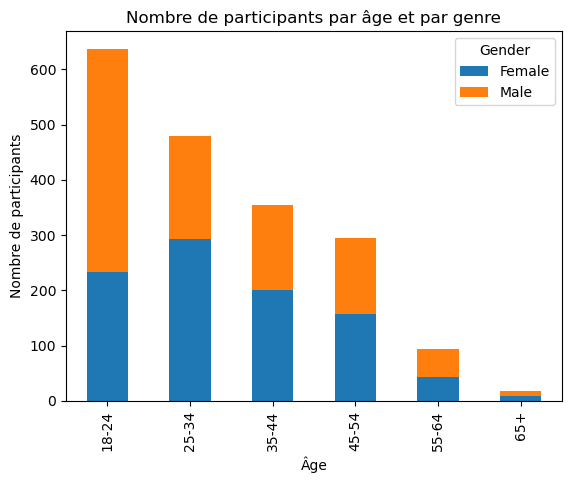

In [21]:
grouped = dfv.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Âge')
plt.ylabel('Nombre de participants')
plt.title('Nombre de participants par âge et par genre')
plt.show()


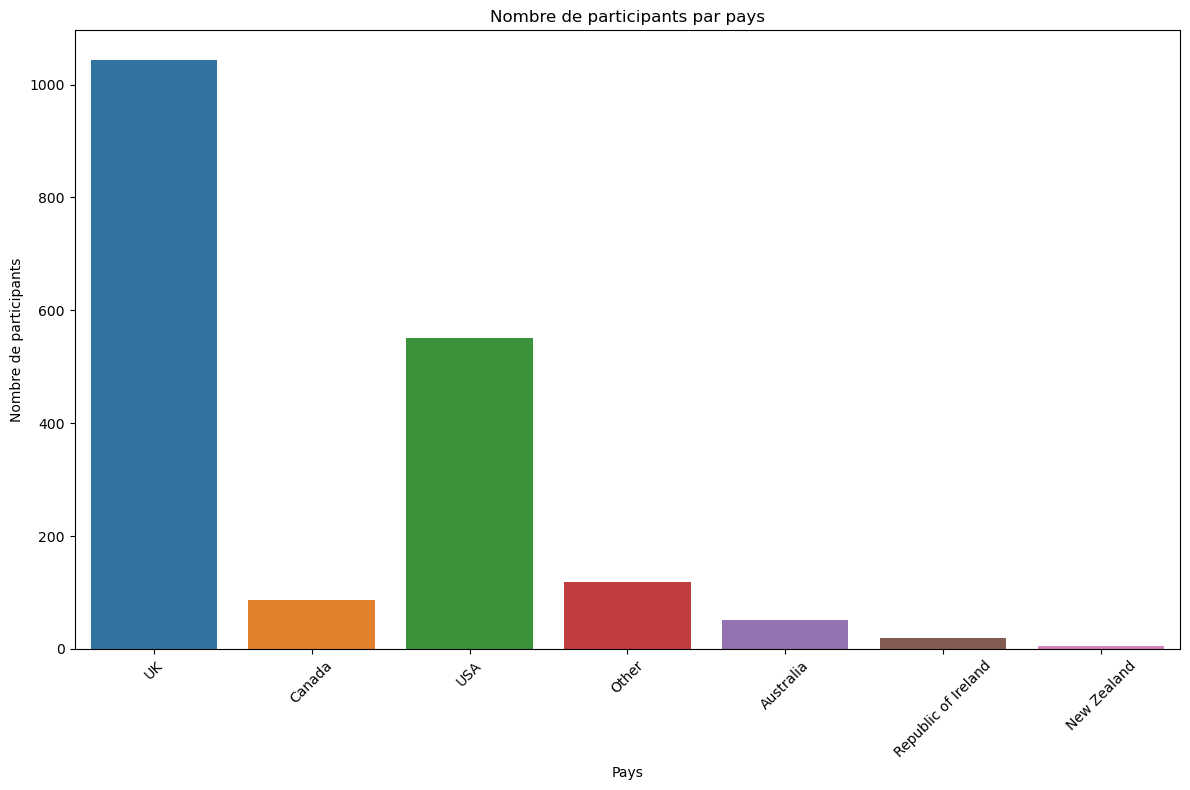

In [22]:

plt.figure(figsize=(12, 8))
sns.countplot(data=dfv, x='Country')

plt.title('Nombre de participants par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de participants')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution des caractéristiques des Nscore dans la population')

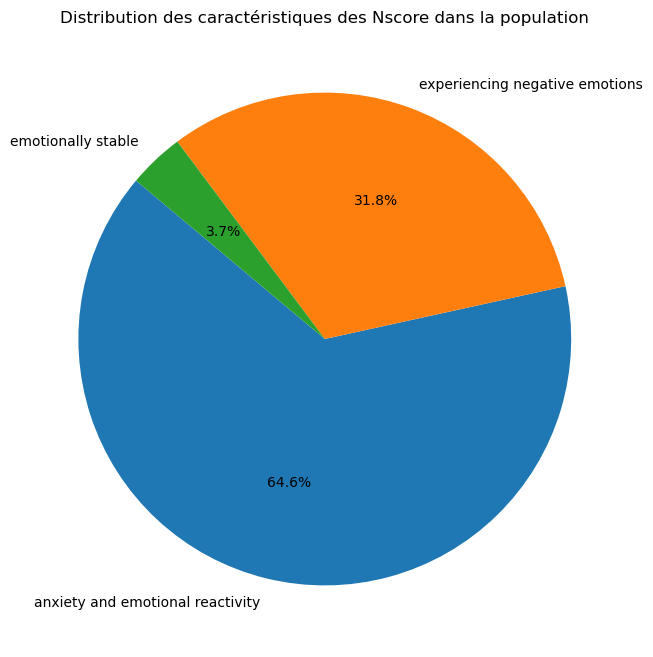

In [23]:
nscore_counts = dfv['N_cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nscore_counts, labels=nscore_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des caractéristiques des Nscore dans la population')



Text(0.5, 1.0, 'Distribution des caractéristiques des Escore dans la population')

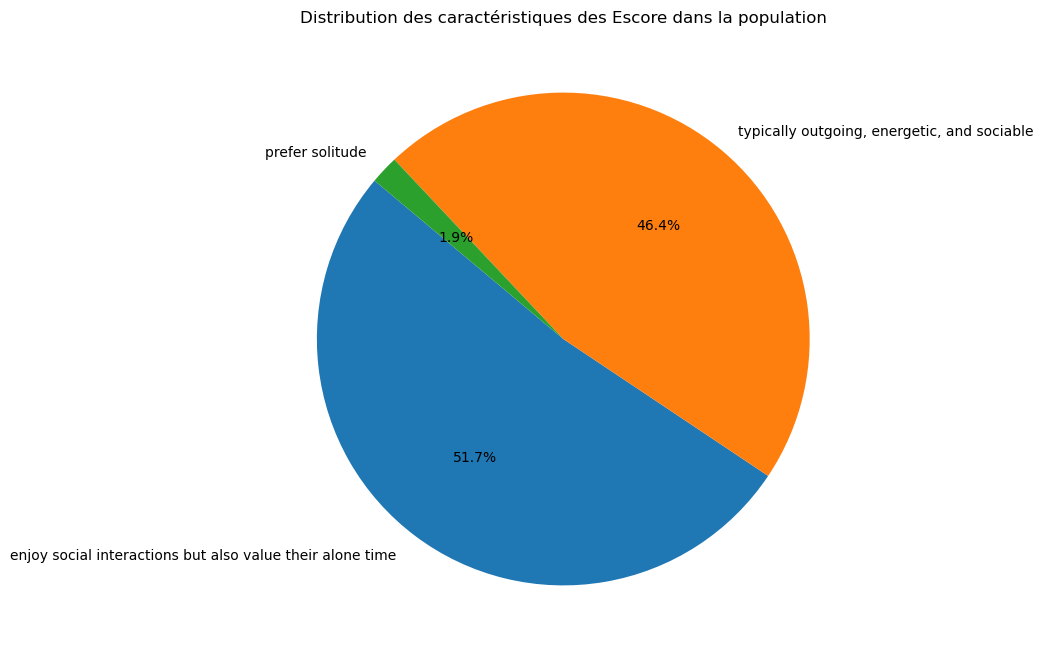

In [24]:
escore_counts = dfv['E_cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(escore_counts, labels=escore_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des caractéristiques des Escore dans la population')


Text(0.5, 1.0, 'Distribution des caractéristiques des Oscore dans la population')

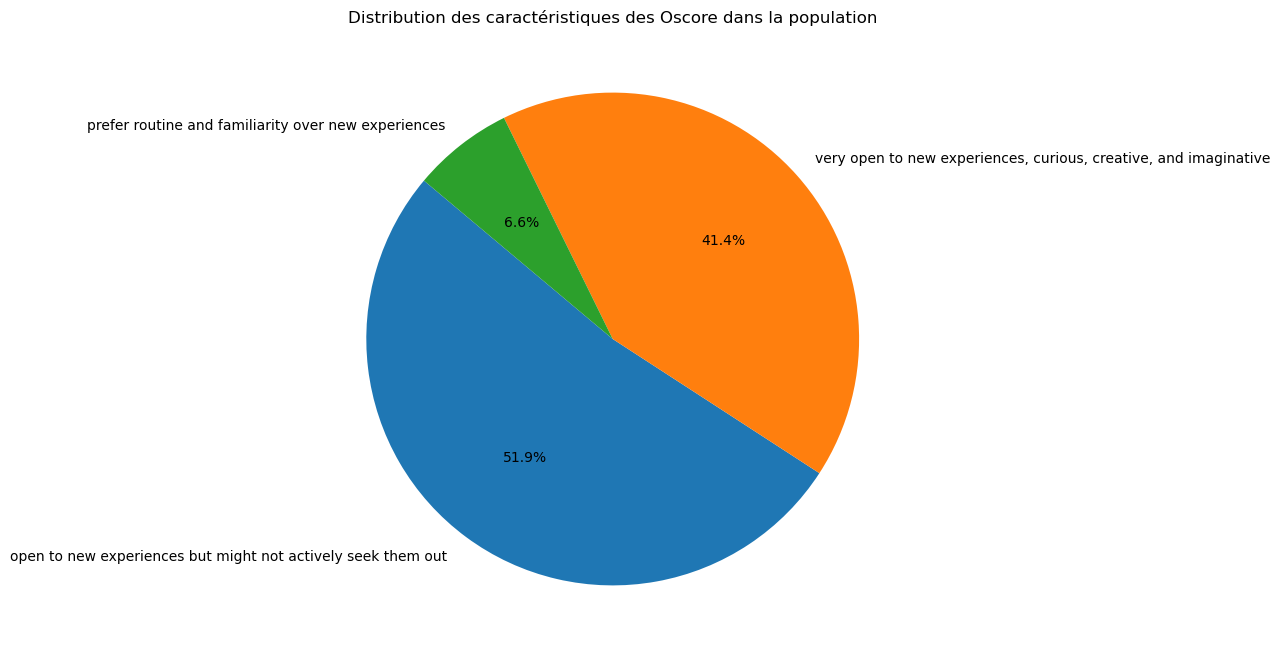

In [25]:
oscore_counts = dfv['O_cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(oscore_counts, labels=oscore_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des caractéristiques des Oscore dans la population')



Text(0.5, 1.0, 'Distribution des caractéristiques des Ascore dans la population')

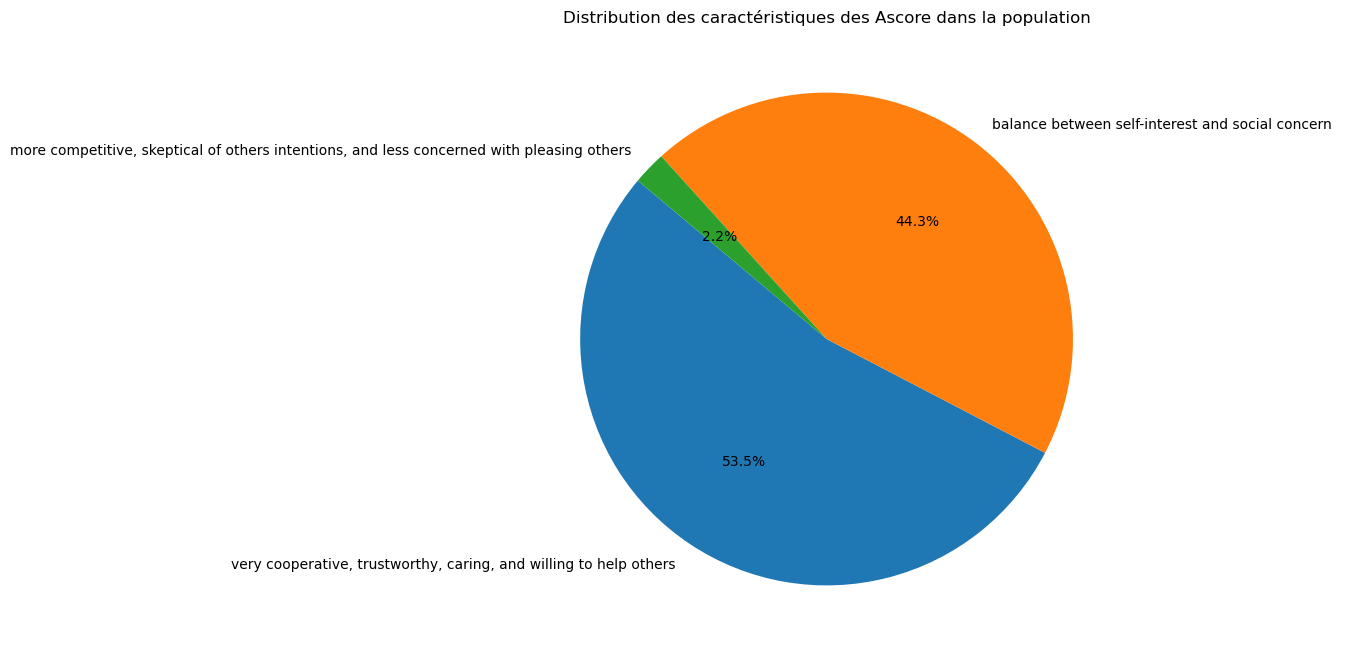

In [26]:
ascore_counts = dfv['A_cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ascore_counts, labels=ascore_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des caractéristiques des Ascore dans la population')



Text(0.5, 1.0, 'Distribution des caractéristiques des Cscore dans la population')

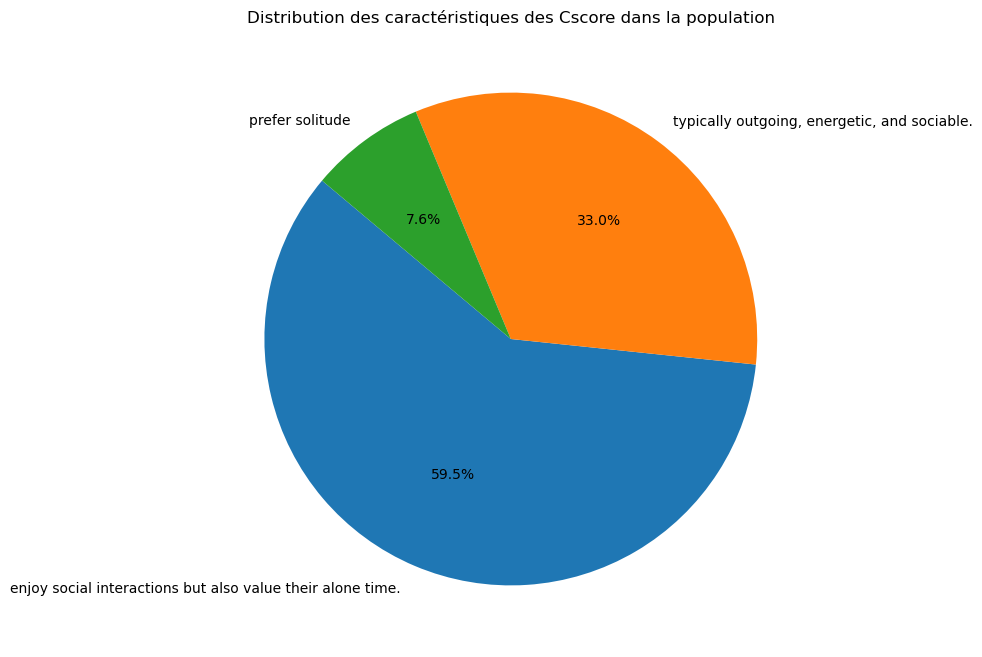

In [27]:
cscore_counts = dfv['C_cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cscore_counts, labels=cscore_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des caractéristiques des Cscore dans la population')

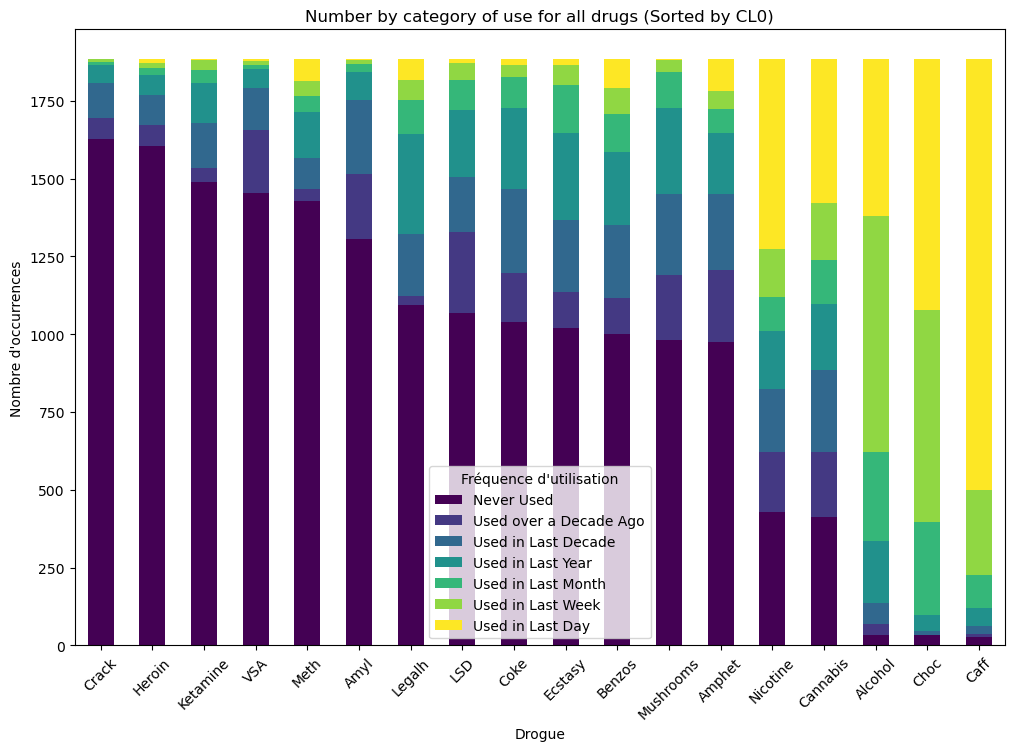

In [30]:
df_drugs = dfgraph[columns_to_map]

usage_counts = df_drugs.apply(pd.value_counts).fillna(0)

sorted_indices = usage_counts.loc['CL0'].sort_values(ascending=False).index
sorted_usage_counts = usage_counts[sorted_indices]

sorted_usage_counts.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Ajout des titres et des étiquettes
plt.title('Number by category of use for all drugs (Sorted by CL0)')
plt.xlabel('Drogue')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.legend(title='Catégorie d\'utilisation')

legend_labels = ['Never Used', 'Used over a Decade Ago', 'Used in Last Decade', 'Used in Last Year', 'Used in Last Month','Used in Last Week','Used in Last Day']
plt.legend(legend_labels, title='Fréquence d\'utilisation')

# Affichage du graphique
plt.show()


With all this information, we would like to link the personnality traits -> to drug usage, this is how we got up with this problematic :
## Can we predict which drug a person has consumed based on their personnality ?

First lets show the corelations between drugs () consumed, and respondent attributes

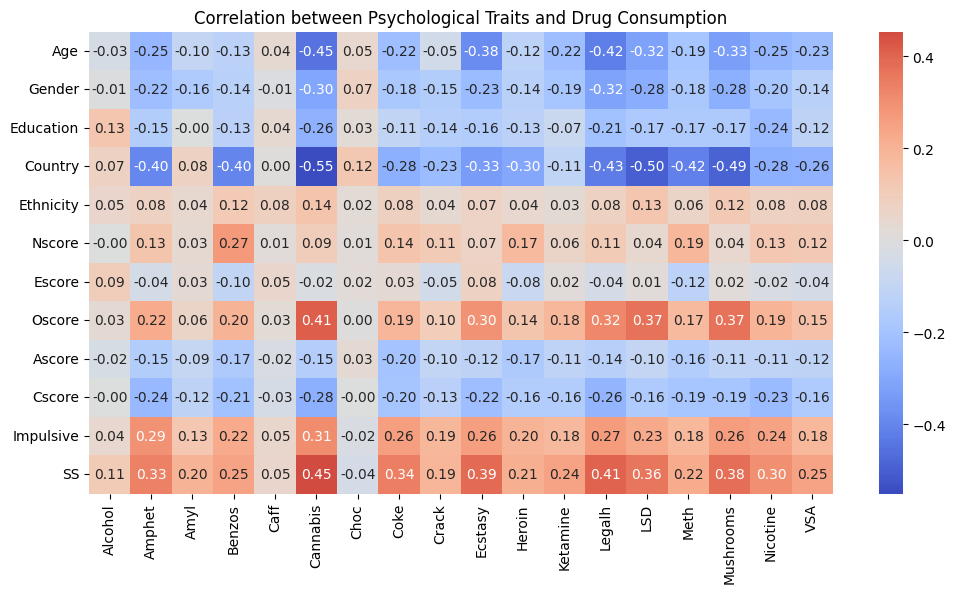

In [17]:
psychological_traits1 = ["Age","Gender","Education","Country","Ethnicity",'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive','SS']
drug_columns = ["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","VSA",]

correlation_matrix = df[psychological_traits1 + drug_columns ].corr()


psych_drug_correlation1 = correlation_matrix.loc[psychological_traits1, drug_columns]

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(psych_drug_correlation1, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation between Psychological Traits and Drug Consumption')
plt.show()

As we can see in this diagram, alcohol, caffeine and Chocolat have the lowest corelations with the respondant attributes, this is not surprising, alcohol is legal and promoted for social interactions in most societies, for caffeine and chocolat,the fact non-psychoactive legal drugs would easily explain why they are not corelated with the respondant attributes.
<br></br>
And here comes a new idea : lets try to judge someones drug consumption, but only on their personality scores.
> In that case we would on take these factors in consideration  : 
- neuroticism (Nscore)
- extraversion (Escore)
- openness to experience (Oscore) 
- agreeableness (Ascore)
- conscientiousness (Cscore)
- Impulsivity (Impulsive)
- Sensation seeking (SS)

#### How does personality affect drug usage ?
In this part we will show how personnality traits can be linked to the consumption of Cannabis

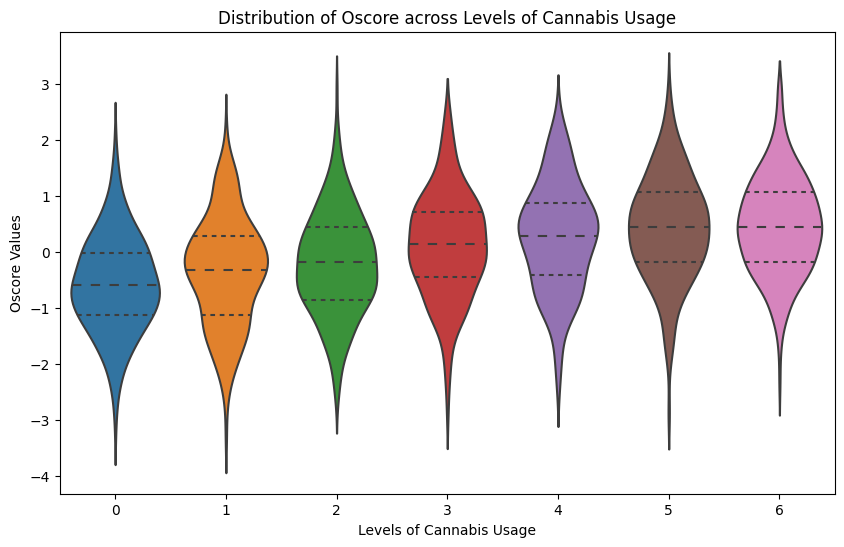

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cannabis', y='Oscore', data=df, inner='quartile')

# Customize the plot as needed
plt.title('Distribution of Oscore across Levels of Cannabis Usage')
plt.xlabel('Levels of Cannabis Usage')
plt.ylabel('Oscore Values')
plt.show()


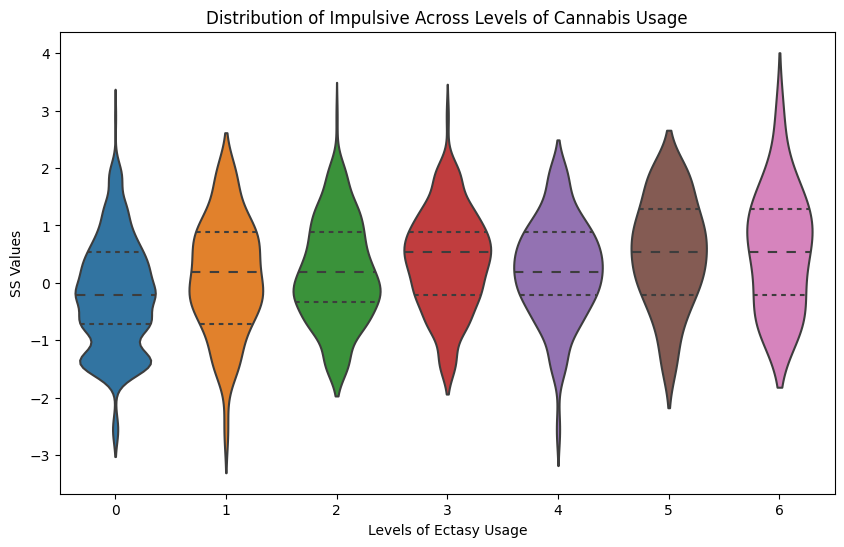

In [19]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Ecstasy', y='Impulsive', data=df, inner='quartile')

# Customize the plot as needed
plt.title('Distribution of Impulsive Across Levels of Cannabis Usage')
plt.xlabel('Levels of Ectasy Usage')
plt.ylabel('SS Values')
plt.show()

Lets try to predict a the SINGLE drug consumed.
Thanks to the correlation table, we can see that the correlations of each drug taken separately are low. <br></br> Lets still try to implement a knn algorithm to see the precision :

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

selected_drug = 'LSD'
features = ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]
X = df[features]
y = df[selected_drug]

knn_model = KNeighborsClassifier(n_neighbors=5)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print(f"Mean precision with cross validation : {accuracy.mean():.2f}")

Mean precision with cross validation : 0.53


> Using this precedent model, we do not find a reliable model (i.e., around 95%). This is why it is necessary to group drugs to try to obtain a more relevant model.

 #### We will try another approach : 
Lets try to make drug groups, since we know some drugs have very similar effects like mushrooms and lsd. 
 - First we lets show the correlations between drugs :

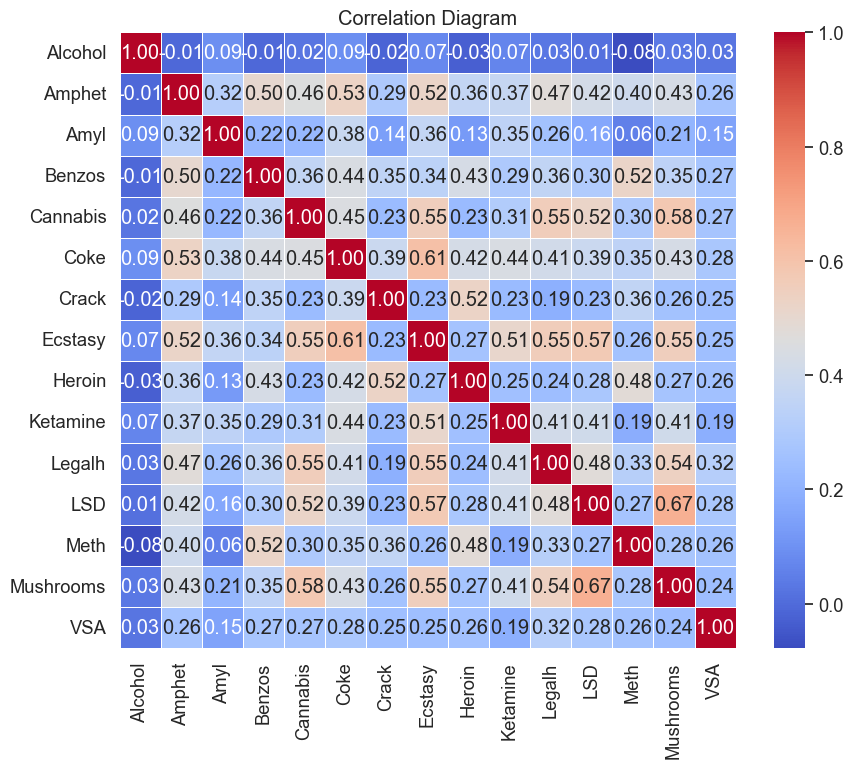

In [21]:
correlation_columns = ["Alcohol", "Amphet", "Amyl", "Benzos", "Cannabis", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms",  "VSA"]

# Create a correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Create a correlation plot
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Diagram")
plt.show()

- #### Now lets make drug groups with the correlations : 
In this cell we : 
- define the hard drug column (yes, we included alcohol),
- Calculate the correlation matrix of these drugs
- Identify groups of drugs with strongly correlated consumption patterns (groups with at least 2 drugs in it)

In [22]:
drug_columns = ["Alcohol", "Amphet", "Amyl", "Benzos", "Cannabis", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms",  "VSA"]

selected_df = df[drug_columns]

# Initialize correlation matrix
correlation_matrix = selected_df.corr()

# Find groups of drugs with strong correlations
correlation_groups = []

# we aim to get all the correlation_groups over 40% correlation

threshold = 0.8
while threshold > 0.4 :
    correlated_groups = []
    for drug in drug_columns : 
        correlated_drugs = correlation_matrix[drug_columns][drug].abs() > threshold
        # get the list of the correlated drugs with "drug"
        correlated_group = list(correlation_matrix[drug_columns][correlated_drugs].index)
        if len(correlated_group) >= 2 and len(correlated_group)< 4 and correlated_group not in correlated_groups:
            correlated_groups.append(correlated_group)
            
    print("Groups with a correlation over: {:.2f}".format(threshold))  
    for group in correlated_groups :     
        print(group)
    print()
    
    threshold -= 0.1


Groups with a correlation over: 0.80

Groups with a correlation over: 0.70

Groups with a correlation over: 0.60
['Coke', 'Ecstasy']
['LSD', 'Mushrooms']

Groups with a correlation over: 0.50
['Amphet', 'Benzos', 'Meth']
['Amphet', 'Coke', 'Ecstasy']
['Crack', 'Heroin']
['Ecstasy', 'Ketamine']
['Benzos', 'Meth']

Groups with a correlation over: 0.40
['Crack', 'Heroin']
['Benzos', 'Heroin', 'Meth']



With this correlation group information, and with information on the drugs, we can build groups of drugs.
For example, LSD and mushrooms are both drugs of the psychedelic family, both of these molecules attach to the same neuro-receptor in the brain (in this case it is the 5 HT2A). <br> </br>With that knowledge in mind, we will build groups by type of drug and with the help of our correlation analysis
- 1st Group : LSD and mushrooms
    > LSD and mushroooms are both psychedelics, with their molecules binding to the 5HT2A neuro-receptor in the brain, inducing similar visual patterns and global body effects
- 2nd Group : Coke and Ecstasy
    > Cokain and Ecstasy are very common party drugs, they have stimulant properties
- 3rd Group : Amphetamines,  Meth
    > Amphetamine and  Methamphetamine are extremely stimilant drugs, they are not as common in parties
- 4th Group : Crack, Heroin
    > Crack and heroin are both opioid derivatives, known for their devastating effects on the human brain, they are a common street drug
- 5th Group : Ecstasy, Ketamine
    >  Ketamine and Ecstay have seen a resurgence in recent years in the UK party and club scenes

In [23]:
psychedelics = ['LSD', 'Mushrooms']
party_drugs = ["Coke","Ecstasy"]
stimulants = ['Amphet', 'Meth']
opioids = ['Crack', 'Heroin']
UK_drug_scene = ['Ecstasy',"Ketamine"] # these 2 drugs are extremely common in parties in UK

all_drug_types = {"Psychedelics " : psychedelics,
                  "Party drugs" : party_drugs, 
                  "Stimulants" : stimulants, 
                  "Opioid derivatives": opioids, 
                  "UK drug scene" : UK_drug_scene}

#### Now lets see the correlations between the drug groups and the personnality scores :

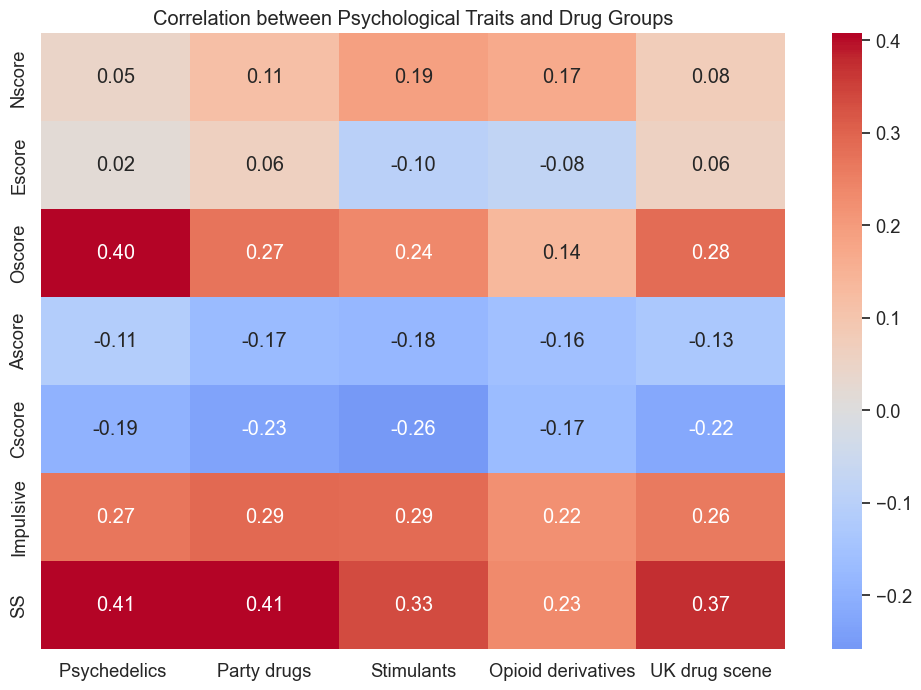

In [24]:
# Create a composite score for each group
for group_name, group_drugs in all_drug_types.items():
    df[group_name] = df[group_drugs].mean(axis=1)

# List of psychological traits
psychological_traits = [ 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Now create a correlation matrix that includes the composite scores for the drug groups
correlation_matrix = df[psychological_traits + list(all_drug_types.keys())].corr()

# Isolate the section of the correlation matrix that includes the correlations between traits and drug groups
trait_group_correlation = correlation_matrix.loc[psychological_traits, list(all_drug_types.keys())]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(trait_group_correlation, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation between Psychological Traits and Drug Groups')
plt.show()


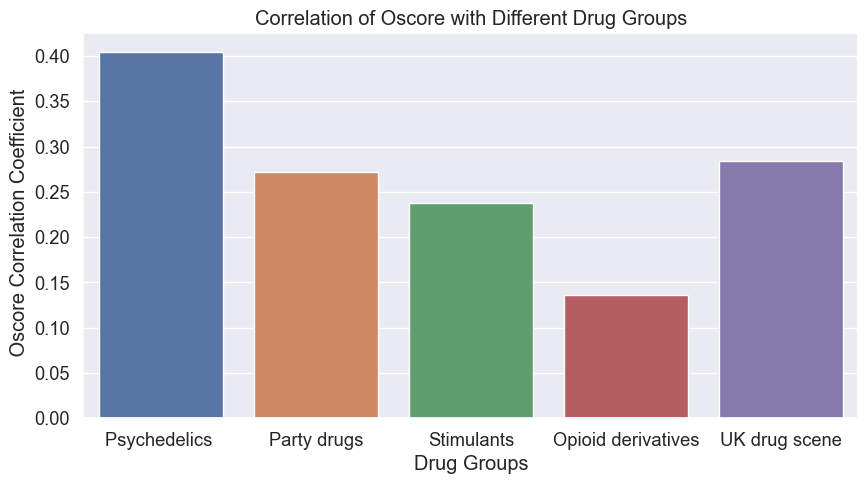

In [25]:

oscore_correlations = trait_group_correlation.loc['Oscore',[ "Psychedelics " ,"Party drugs"  , "Stimulants" ,"Opioid derivatives","UK drug scene"] ]

# Create a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=oscore_correlations.index, y=oscore_correlations.values)

plt.title('Correlation of Oscore with Different Drug Groups')
plt.xlabel('Drug Groups')
plt.ylabel(' Oscore Correlation Coefficient')
plt.show()


# III. MODELING

### What kind of drug consumer do we want to predict ?
In our study, we will consider that a drug consumer is "predisposed" to consume a type (in our code its a group) of drug, and the type of drug is what we are trying to predict.
#### At what point do we consider someone as a consumer of a type of drug?
A user is a consumer of a type of drug if  :
- he has used a drug of the group type in the last week or :
- he used both drugs in the last month

In [26]:
def predispose_to_group(drug_type_columns) : 
    # columns that we use to do the predictions :
    columns_to_keep = ["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]
    
    # create the dataset
    new_df = df[columns_to_keep + drug_type_columns]

    # Calculate the sum of CL scores of hard drugs for each row
    drug_type_sum = new_df[drug_type_columns].sum(axis=1)

    # Check if he has used at least 2 of these drugs in the last year
    # (CL4   Used in Last Month , if he has used 2 of the drugs this month that means we have 4+4=8)
    sum_over_7 = (drug_type_sum >=8 )

    # Check if any individual CL score of a drug is over 4 for each row
    # (CL5   Used in Last Week)
    any_cl_over_4= (new_df[drug_type_columns] > 4).any(axis=1)

    # Create a new column called "drug_user" with initial values set to 0
    new_df['drug_user'] = 0

    # Update the "drug_user" column to 1 for rows where either the sum of CL scores of the drug type is over 6 or any individual CL score of a drug is over 3
    new_df.loc[sum_over_7 | any_cl_over_4, 'drug_user'] = 1

    # take off all the drugs and just keep the drug_user column
    new_df  = new_df[columns_to_keep + ["drug_user"]]

    # return the dataframe with the drug user info on the type of drug
    return new_df



Lets see the number of drugies we have for each categorie : 

In [27]:
for drug_type in all_drug_types:
    drug_list = ", ".join(all_drug_types[drug_type])
    s = predispose_to_group(all_drug_types[drug_type])
    print(f"{drug_type} ({drug_list})  :  {s['drug_user'].sum()} cases")

Psychedelics  (LSD, Mushrooms)  :  135 cases
Party drugs (Coke, Ecstasy)  :  163 cases
Stimulants (Amphet, Meth)  :  254 cases
Opioid derivatives (Crack, Heroin)  :  37 cases
UK drug scene (Ecstasy, Ketamine)  :  128 cases


We have 135 people that are high psychedelic users ! And the psychedelics df looks like this : 

In [29]:
psy = predispose_to_group(psychedelics)
psy

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,drug_user
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
...,...,...,...,...,...,...,...,...
1880,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1881,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1883,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


## Implementing ML algorithms on our psychedelic dataframe
First we will try to use the knn algorithm<br></br>
To start on a good basis, lets do a grid search function for our knn algorithm, so that we can apply it easily to our different drug groups
### Grid Search Function : 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np


def grid_search_knn(drug_group) :
    # Separate the features (X) and the target variable (y)
    X = drug_group.drop('drug_user', axis=1)
    y = drug_group['drug_user']
    # Define the parameter grid
    params = {
        "n_neighbors": np.arange(1, 20),
        "metric": ["euclidean", "manhattan","cityblock"],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    }

    # Create the KNN classifier
    knn = KNeighborsClassifier()

    # Create the GridSearchCV object
    grid = GridSearchCV(estimator=knn, param_grid=params)

    # Fit the grid search to the training data
    grid.fit(X, y)

    # Print the best score and best parameters
    print("Best Score:", grid.best_score_)
    print("Best Number of Neighbors:", grid.best_estimator_.n_neighbors)
    print("Best Metric:", grid.best_estimator_.metric)
    print("Best Weighting Scheme:", grid.best_estimator_.weights)
    print("Best p value:", grid.best_estimator_.p,"\n")
    return [grid.best_score_, grid.best_estimator_.n_neighbors, grid.best_estimator_.metric, grid.best_estimator_.weights, grid.best_estimator_.p]

Lets try on our psychedelics : 

In [31]:
psy_grid_knn= grid_search_knn(psy)

Best Score: 0.9280765957446808
Best Number of Neighbors: 12
Best Metric: euclidean
Best Weighting Scheme: uniform
Best p value: 1 



In the psychedelics case the best number of neighbors is 12, the best metric is the eucliean metric, and the best weights if uniform <br></br> 
Lets find out how these values vary for our different drug groups : 

In [32]:
for drug_cols in all_drug_types : 
    drug_list = ", ".join(all_drug_types[drug_cols])
    drug_group = predispose_to_group(all_drug_types[drug_cols])
    print(f"{drug_cols} ({drug_list})  :\n")
    drug_grid_knn = grid_search_knn(drug_group)

Psychedelics  (LSD, Mushrooms)  :

Best Score: 0.9280765957446808
Best Number of Neighbors: 12
Best Metric: euclidean
Best Weighting Scheme: uniform
Best p value: 1 

Party drugs (Coke, Ecstasy)  :

Best Score: 0.9131602836879432
Best Number of Neighbors: 12
Best Metric: euclidean
Best Weighting Scheme: uniform
Best p value: 1 

Stimulants (Amphet, Meth)  :

Best Score: 0.8657432624113476
Best Number of Neighbors: 17
Best Metric: manhattan
Best Weighting Scheme: uniform
Best p value: 1 

Opioid derivatives (Crack, Heroin)  :

Best Score: 0.9802893617021275
Best Number of Neighbors: 2
Best Metric: euclidean
Best Weighting Scheme: uniform
Best p value: 1 

UK drug scene (Ecstasy, Ketamine)  :

Best Score: 0.9318070921985815
Best Number of Neighbors: 12
Best Metric: euclidean
Best Weighting Scheme: uniform
Best p value: 1 



We can see our algorithm works a bit differntly for each type of drug, and has the most accuracy with the opioid derivatives <br></br> 
To make thing satisfying, lets try our knn algorithm on the opiods derivatives. We know from the output we just did that : 
Opioid derivatives (Crack, Heroin)  :

- Best Number of Neighbors: 2
- Best Metric: euclidean
- Best Weighting Scheme: uniform
- Best p value: 1 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

opioids_df = predispose_to_group(opioids)
# Separate the features (X) and opiod usage (y)
X = opioids_df.drop('drug_user', axis=1)
y = opioids_df['drug_user']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the KNeighborsClassifier model with 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2, metric="euclidean", weights="uniform", p=1)

# Fit the model to the data
knn.fit(X_train, y_train)

# Make predictions on the original data
predictions = knn.predict(X)

y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_test)



Accuracy on the test set: 0.9867021276595744


In this part of the code, we evaluate the performance of the KNN model using the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric.
- We compute the False Positive Rate (FPR), True Positive Rate (TPR), and the corresponding classification thresholds using the roc_curve function. The FPR represents the proportion of falsely predicted negative samples, while the TPR represents the proportion of correctly predicted positive samples.
- We calculate the AUC by calling the roc_auc_score function, which measures the overall performance of the model based on the ROC curve. The AUC value ranges between 0 and 1, with a higher value indicating better discrimination power.

AUC: 0.9491480611045828


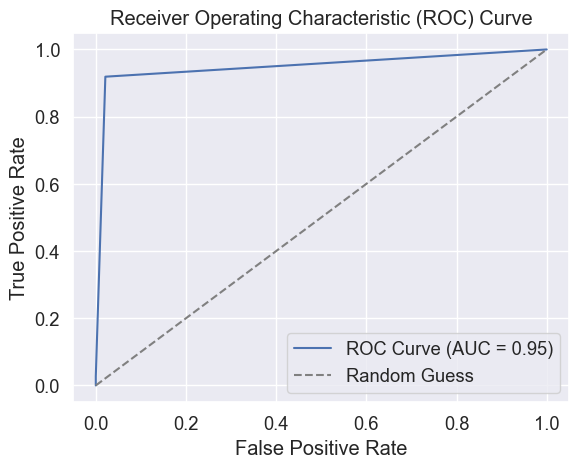

In [38]:
# Calculate the predicted probabilities for each class
proba = knn.predict_proba(X)[:, 1]

# Calculate the false positive rate, true positive rate, and classification threshold
fpr, tpr, thresholds = roc_curve(y, proba)

# Calculate the area under the ROC curve
auc = roc_auc_score(y, proba)
print("AUC:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The ROC curve helps us understand the trade-off between true positive rate and false positive rate, while the AUC provides a single metric to assess the model's performance. here we have AUC = 0.95, which is really good !

## Cross-validation : to evaluate the knn algo on opioids

In [40]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(knn, X, y, cv=4)
print(accuracy)
print(f"Mean precision with cross validation : {accuracy.mean():.2f}")

[0.9787234  0.98081023 0.98081023 0.98081023]
Mean precision with cross validation : 0.98


Now we will try another classification model :  we will use logistic regression because it is a widely used statistical model for binary classification tasks, exactly what we need !
### Logistic rgression
First we will make  logistic regression function to apply it to our different drug groups easily

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def logistic_reg(drug_type) : 
    X = drug_type.drop('drug_user', axis=1)
    y = drug_type['drug_user']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

    # Create a logistic regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy,"\n")
    return accuracy

Lets try to implement it with all our drug types, and see how it compares to the knn model

In [42]:
for drug_cols in all_drug_types : 
    drug_list = ", ".join(all_drug_types[drug_cols])
    drug_group = predispose_to_group(all_drug_types[drug_cols])
    print(f"{drug_cols} ({drug_list})  :")
    drug_grid_knn = logistic_reg(drug_group)

Psychedelics  (LSD, Mushrooms)  :
Accuracy: 0.949468085106383 

Party drugs (Coke, Ecstasy)  :
Accuracy: 0.9202127659574468 

Stimulants (Amphet, Meth)  :
Accuracy: 0.875 

Opioid derivatives (Crack, Heroin)  :
Accuracy: 0.9867021276595744 

UK drug scene (Ecstasy, Ketamine)  :
Accuracy: 0.925531914893617 



Overall, the logistic regression has better results than our knn algorithm, here are the results : 
- 95 % accuracy   -> logistic regression
- 93 % accuracy  -> knn algorithm
<br></br>
#### Lets try to Tune the model using GridSearchCV

In [46]:
X = psy.drop('drug_user', axis=1)
y = psy['drug_user']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Create a logistic regression model
psy_model = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(psy_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


Lets apply the parameters above and see how it changes our logistic regression

In [47]:
psy_model = LogisticRegression(C=0.1,max_iter=100,penalty='l1',solver='liblinear')
psy_model.fit(X_train, y_train)

y_pred = psy_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9521276595744681


This time the results are better ! We are over 95%, and won 0.02 accuracy with this tuning

#### In conclusion we can predict with over 95% accuracy if someone is a big consumer of psychedelic drugs !
The best algorithm for our study is the logistic regression, with specific parameters.